In [1]:
from typing import List
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import defaultdict

In [2]:
config_dirs = [
    '/home/veteran/Computer-Architecture-Lab-CSE220/lab4/results/vi1/',
    '/home/veteran/Computer-Architecture-Lab-CSE220/lab4/results/vi2/',
    '/home/veteran/Computer-Architecture-Lab-CSE220/lab4/results/vi5/',
    '/home/veteran/Computer-Architecture-Lab-CSE220/lab4/results/vi10/',
    '/home/veteran/Computer-Architecture-Lab-CSE220/lab4/results/vi20/',
]

spec_names = sorted([
    'drmemtrace.omnetpp.552936.5555.dir',
    'drmemtrace.sgcc_base.mytest-m64.555062.6619.dir',
    'drmemtrace.specrand_i.553922.3230.dir',
    'drmemtrace.perlbench_s_base.mytest-m64.554262.0160.dir',
    'drmemtrace.leela_s_base.mytest-m64.555086.8417.dir',
    'drmemtrace.x264.555077.8155.dir',
    'drmemtrace.deepsjeng.553743.1618.dir',
    'drmemtrace.exchange2.553888.1738.dir',
    'drmemtrace.mcf_s_base.mytest-m64.554166.9011.dir',
    'drmemtrace.xalancbmk_s_base.mytest-m64.555084.9837.dir'
])

image_path = '/home/veteran/Computer-Architecture-Lab-CSE220/lab4/Images_Size/'

In [3]:
def get_simple_name(spec_path: str) -> str:
    return spec_path.split('.')[1]

In [4]:
configs = ['vc_1', 'vc_2', 'vc_5', 'vc_10', 'vc_20']
simple_names = [get_simple_name(spec) for spec in spec_names]

In [5]:
def extract_one_spec(spec: str) -> List[float]:
    ipc_dict = dict()
    dcms_dict = dict()
    vch_dict = dict()
    cold_dict = dict()
    cpt_dict = dict()
    cft_dict = dict()
    dcms_no_dict = dict()
    for i, config in enumerate(config_dirs):
        stat_path = F'{config}{spec}/memory.stat.0.out'
        mem_file = open(stat_path)
        m_lines = mem_file.readlines()
        key = configs[i]
        ipc_dict[key] = float(m_lines[4].split()[-1])
        dcms_dict[key] = float(m_lines[31].split()[2][:-1])
        vch_dict[key] = float(m_lines[43].split()[1])
        cold_dict[key] = float(m_lines[37].split()[1])
        cpt_dict[key] = float(m_lines[39].split()[1])
        cft_dict[key] = float(m_lines[41].split()[1])
        dcms_no_dict[key] = float(m_lines[31].split()[1])
    return ipc_dict, dcms_dict, vch_dict, cold_dict, cpt_dict, cft_dict, dcms_no_dict

In [6]:
spec_data = defaultdict(dict)
for spec in spec_names:
    data_lst = extract_one_spec(spec, )
    spec_data[get_simple_name(spec)]['ipc'] = data_lst[0]
    spec_data[get_simple_name(spec)]['dcms'] = data_lst[1]
    spec_data[get_simple_name(spec)]['vch'] = data_lst[2]
    spec_data[get_simple_name(spec)]['cold'] = data_lst[3]
    spec_data[get_simple_name(spec)]['cpt'] = data_lst[4]
    spec_data[get_simple_name(spec)]['cft'] = data_lst[5]
    spec_data[get_simple_name(spec)]['dcms_no'] = data_lst[6]

In [7]:
ipc_df = pd.DataFrame({key: spec_data[key]['ipc'] for key in spec_data})
dcms_df = pd.DataFrame({key: spec_data[key]['dcms'] for key in spec_data})
vch_df = pd.DataFrame({key: spec_data[key]['vch'] for key in spec_data})
cold_df = pd.DataFrame({key: spec_data[key]['cold'] for key in spec_data})
cpt_df = pd.DataFrame({key: spec_data[key]['cpt'] for key in spec_data})
cft_df = pd.DataFrame({key: spec_data[key]['cft'] for key in spec_data})
dcms_no_df = pd.DataFrame({key: spec_data[key]['dcms_no'] for key in spec_data})

ipc_df['average'] = ipc_df.mean(1)
dcms_df['average'] = dcms_df.mean(1)
vch_df['average'] = vch_df.mean(1)
cold_df['average'] = cold_df.mean(1)
cpt_df['average'] = cpt_df.mean(1)
cft_df['average'] = cft_df.mean(1)
dcms_no_df['average'] = dcms_no_df.mean(1)

In [8]:
ipc_df

,deepsjeng,exchange2,leela_s_base,mcf_s_base,omnetpp,perlbench_s_base,sgcc_base,specrand_i,x264,xalancbmk_s_base,average
vc_1,1.92704,2.46506,1.59875,0.81119,1.20735,1.27373,1.21813,2.65841,2.92684,0.99620,1.708270
vc_2,1.93049,2.46171,1.60097,0.81213,1.20807,1.27339,1.21938,2.65846,2.93086,0.99561,1.709107
vc_5,1.94005,2.45767,1.60399,0.81339,1.21157,1.27751,1.22206,2.65907,2.93438,0.99833,1.711802
vc_10,1.93987,2.46560,1.60266,0.81496,1.21389,1.28083,1.22431,2.65909,2.93496,1.00033,1.713650
vc_20,1.95032,2.46493,1.60651,0.81681,1.22139,1.28353,1.22707,2.65966,2.93496,1.00356,1.716874


In [9]:
dcms_df

,deepsjeng,exchange2,leela_s_base,mcf_s_base,omnetpp,perlbench_s_base,sgcc_base,specrand_i,x264,xalancbmk_s_base,average
vc_1,3.653,0.002,1.640,25.730,10.657,6.557,5.910,0.307,3.172,21.348,7.8976
vc_2,3.401,0.002,1.556,25.551,10.492,6.299,5.636,0.229,3.036,21.225,7.7427
vc_5,3.062,0.002,1.420,25.283,10.102,6.010,5.155,0.195,2.902,21.022,7.5153
vc_10,2.744,0.001,1.331,25.043,9.562,5.687,4.662,0.161,2.839,20.883,7.2913
vc_20,2.256,0.001,1.248,24.785,8.657,5.274,4.138,0.002,2.807,20.658,6.9826


In [10]:
vch_df

,deepsjeng,exchange2,leela_s_base,mcf_s_base,omnetpp,perlbench_s_base,sgcc_base,specrand_i,x264,xalancbmk_s_base,average
vc_1,76371.0,41.0,19993.0,117205.0,57674.0,166411.0,124466.0,19536.0,47158.0,68339.0,69719.4
vc_2,126967.0,64.0,40759.0,181008.0,105980.0,229890.0,187659.0,38211.0,56403.0,114571.0,108151.2
vc_5,201548.0,118.0,75377.0,278559.0,221587.0,304240.0,294689.0,46336.0,68162.0,169281.0,165989.7
vc_10,273019.0,167.0,97225.0,358180.0,384417.0,382737.0,401087.0,51903.0,72788.0,213064.0,223458.7
vc_20,380972.0,172.0,116317.0,437294.0,657630.0,477310.0,513802.0,64648.0,76336.0,270391.0,299487.2


In [11]:
cold_df

,deepsjeng,exchange2,leela_s_base,mcf_s_base,omnetpp,perlbench_s_base,sgcc_base,specrand_i,x264,xalancbmk_s_base,average
vc_1,27089.0,239.0,4077.0,345025.0,293163.0,32772.0,45292.0,157.0,90712.0,44339.0,88286.5
vc_2,27089.0,239.0,4077.0,345025.0,293163.0,32772.0,45292.0,157.0,90712.0,44339.0,88286.5
vc_5,27089.0,239.0,4077.0,345025.0,293163.0,32772.0,45292.0,157.0,90712.0,44339.0,88286.5
vc_10,27089.0,239.0,4077.0,345025.0,293163.0,32772.0,45292.0,157.0,90712.0,44339.0,88286.5
vc_20,27089.0,239.0,4077.0,345025.0,293163.0,32772.0,45292.0,157.0,90712.0,44339.0,88286.5


In [12]:
cpt_df

,deepsjeng,exchange2,leela_s_base,mcf_s_base,omnetpp,perlbench_s_base,sgcc_base,specrand_i,x264,xalancbmk_s_base,average
vc_1,193939.0,384.0,299223.0,9408900.0,2274712.0,1528005.0,631497.0,347.0,849463.0,6102199.0,2128866.9
vc_2,194044.0,384.0,297714.0,9409625.0,2275094.0,1524074.0,631082.0,347.0,851274.0,6106033.0,2128967.1
vc_5,193991.0,383.0,291190.0,9409925.0,2273784.0,1523255.0,629834.0,347.0,850804.0,6110073.0,2128358.6
vc_10,193929.0,383.0,281869.0,9406608.0,2271794.0,1522733.0,627392.0,347.0,851136.0,6110253.0,2126644.4
vc_20,192822.0,383.0,266771.0,9402946.0,2267361.0,1513069.0,622721.0,347.0,853289.0,6103013.0,2122272.2


In [13]:
cft_df

,deepsjeng,exchange2,leela_s_base,mcf_s_base,omnetpp,perlbench_s_base,sgcc_base,specrand_i,x264,xalancbmk_s_base,average
vc_1,1136137.0,237.0,292867.0,1157166.0,2501901.0,1331976.0,2089709.0,99350.0,158009.0,1608540.0,1037589.2
vc_2,1040785.0,214.0,263469.0,1064056.0,2417992.0,1218137.0,1958064.0,73843.0,108999.0,1550038.0,969559.7
vc_5,912456.0,113.0,220170.0,925496.0,2222050.0,1087191.0,1728833.0,62887.0,62737.0,1460746.0,868267.9
vc_10,792838.0,16.0,196907.0,807713.0,1952829.0,940967.0,1496666.0,51808.0,40286.0,1401080.0,768111.0
vc_20,611266.0,0.0,181765.0,683084.0,1505686.0,764602.0,1252649.0,0.0,26869.0,1315373.0,634129.4


In [14]:
dcms_no_df

,deepsjeng,exchange2,leela_s_base,mcf_s_base,omnetpp,perlbench_s_base,sgcc_base,specrand_i,x264,xalancbmk_s_base,average
vc_1,1357165.0,860.0,596167.0,10911091.0,5069776.0,2892753.0,2766498.0,99854.0,1098184.0,7755078.0,3254742.6
vc_2,1261918.0,837.0,565260.0,10818706.0,4986249.0,2774983.0,2634438.0,74347.0,1050985.0,7700410.0,3186813.3
vc_5,1133536.0,735.0,515437.0,10680446.0,4788997.0,2643218.0,2403959.0,63391.0,1004253.0,7615158.0,3084913.0
vc_10,1013856.0,638.0,482853.0,10559346.0,4517786.0,2496472.0,2169350.0,52312.0,982134.0,7555672.0,2983041.9
vc_20,831177.0,622.0,452613.0,10431055.0,4066210.0,2310443.0,1920662.0,504.0,970870.0,7462725.0,2844688.1


In [15]:
def plot_ipc(start, end):
    x = np.arange(start = 0, stop = (end - start + 1) * 25, step = 25)
    width = 3
    sinlge_width = 3
    fig, ax = plt.subplots()
    plt.xlim((-16, 268))
    plt.ylim((0, 4))

    for i in range(len(configs)):
        ax.bar(x - (2 - i) * width, list(ipc_df.loc[configs[i], simple_names[start: end] + ['average']]), sinlge_width, label=configs[i], in_layout=False)
    ax.set_ylabel('Instruction / Cycle')
    ax.set_title('Instruction Per Cycle')
    ax.set_xticks(x, simple_names[start: end] + ['average'])
    ax.legend(loc='upper right')
    plt.subplots_adjust(bottom=0.2, right=1.3)
    plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
#     plt.show()
    plt.savefig(F'{image_path}/IPC_{start}{end}', dpi=200, bbox_inches='tight')

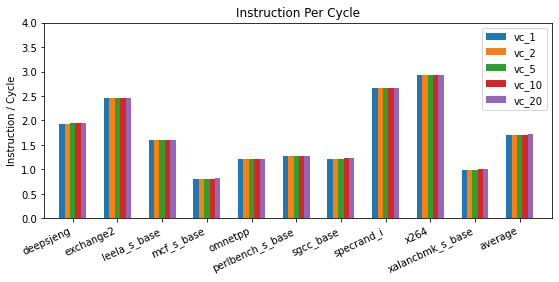

In [16]:
plot_ipc(0, 10)

In [17]:
def plot_dcms(start, end):
        specs = simple_names + ['average']
        x = np.arange(start = 0, stop = (end - start + 1) * 25, step = 25)
        width = 3
        sinlge_width = 3
        fig, ax = plt.subplots()
        plt.xlim((-16, 288))
        plt.ylim((0, 30))
        
        for i in range(len(configs)):
            ax.bar(x - (2 - i) * width, list(dcms_df.loc[configs[i], simple_names[start: end] + ['average']]), sinlge_width, label=configs[i], in_layout=False)

        ax.set_ylabel('DCache Miss Ratio %')
        ax.set_title('DCache Miss Ratio')
        ax.set_xticks(x, simple_names[start: end] + ['average'])
        ax.legend(loc='upper right')
        plt.subplots_adjust(bottom=0.2, right=1.3)
        plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
    #     plt.show()
        plt.savefig(F'{image_path}/DCACHE_MISS_{start}{end}', dpi=200, bbox_inches='tight')

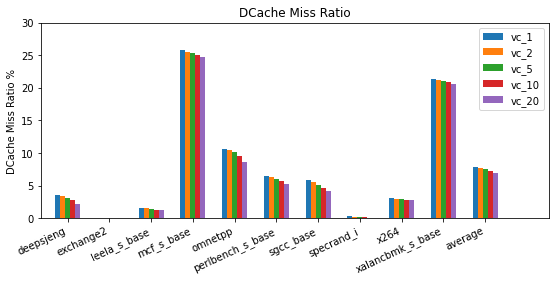

In [18]:
plot_dcms(0, 10)

In [19]:
def plot_vch(start, end):
        specs = simple_names + ['average']
        x = np.arange(start = 0, stop = (end - start + 1) * 10, step = 10)
        width = 4.5
        sinlge_width = 4.5
        fig, ax = plt.subplots()
        plt.xlim((-8, 128))
        plt.ylim((0, 350000))
        
        for i in range(2):
            ax.bar(x - width / 2 * (1 if i == 0 else -1), list(vch_df.loc[configs[i], simple_names[start: end] + ['average']]), sinlge_width, label=configs[i], in_layout=False)

        ax.set_ylabel('Victim Cache Hit')
        ax.set_title('Victim Cache Hit')
        ax.set_xticks(x, simple_names[start: end] + ['average'])
        ax.legend(loc='upper right')
        plt.subplots_adjust(bottom=0.2, right=1.3)
        plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
    #     plt.show()
        plt.savefig(F'{image_path}/VICTIM_CACHE_HIT_{start}{end}', dpi=200, bbox_inches='tight')

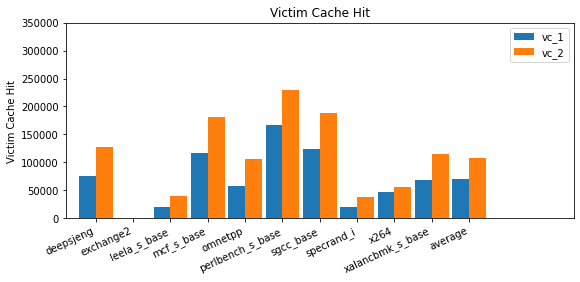

In [20]:
plot_vch(0, 10)

In [21]:
def plot_dcms_stacked(start, end):
        x = np.arange(start = 0, stop = (end - start + 1) * 10, step = 10)
        width = 4.5
        single_width = 4.5
        fig, ax = plt.subplots()
        plt.xlim((-8, 128))
        plt.ylim((0, 28))

        labeld = False
        
        for i in range(2):
            btm = list(cold_df.loc[configs[i], simple_names[start: end] + ['average']] * dcms_df.loc[configs[i], simple_names[start: end] + ['average']] / dcms_no_df.loc[configs[i], simple_names[start: end] + ['average']])
            mid = list(cpt_df.loc[configs[i], simple_names[start: end] + ['average']] * dcms_df.loc[configs[i], simple_names[start: end] + ['average']] / dcms_no_df.loc[configs[i], simple_names[start: end] + ['average']])
            top = list(cft_df.loc[configs[i], simple_names[start: end] + ['average']] * dcms_df.loc[configs[i], simple_names[start: end] + ['average']] / dcms_no_df.loc[configs[i], simple_names[start: end] + ['average']])
            btm_mid = list(cpt_df.loc[configs[i], simple_names[start: end] + ['average']] * dcms_df.loc[configs[i], simple_names[start: end] + ['average']] / dcms_no_df.loc[configs[i], simple_names[start: end] + ['average']] + \
                cold_df.loc[configs[i], simple_names[start: end] + ['average']] * dcms_df.loc[configs[i], simple_names[start: end] + ['average']] / dcms_no_df.loc[configs[i], simple_names[start: end] + ['average']])
            ax.bar(x - width / 2 * (1 if i == 0 else -1), btm, single_width, color='tab:red', label=F'Compulsory' if not labeld else '', in_layout=False)
            ax.bar(x - width / 2 * (1 if i == 0 else -1), mid, single_width, color='tab:blue', label=F'Capacity' if not labeld else '', bottom=btm, in_layout=False)
            ax.bar(x - width / 2 * (1 if i == 0 else -1), top, single_width, color='tab:orange', label=F'Conflict'  if not labeld else '', bottom=btm_mid, in_layout=False)
            labeld = True
        ax.set_ylabel('DCache Miss Ratio %')
        ax.set_title('DCache Miss Ratio (In Different Type)')
        ax.set_xticks(x, simple_names[start: end] + ['average'])
        ax.legend(loc='upper right')
        plt.subplots_adjust(bottom=0.2, right=1.3)
        plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
        plt.savefig(F'{image_path}/DCACHE_MISS_STACKED_{start}{end}', dpi=200, bbox_inches='tight')

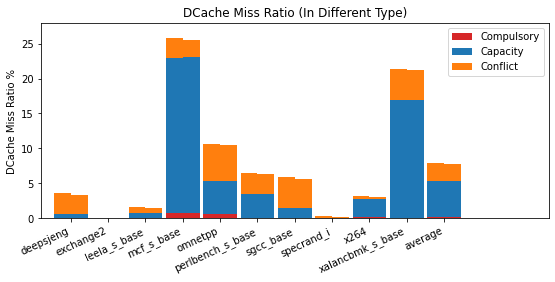

In [22]:
plot_dcms_stacked(0, 10)